# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

In [2]:
sie_df = pd.read_csv("./data/arctic_sie_clean.csv")
sie_df.head(10)

,date,extent_million_sq_km
0,10/26/1978,10.231
1,10/28/1978,10.420
2,10/30/1978,10.557
3,11/1/1978,10.670
4,11/3/1978,10.777
5,11/5/1978,10.968
6,11/7/1978,11.080
7,11/9/1978,11.189
8,11/11/1978,11.314
9,11/13/1978,11.460


The dataset contains a daily measurement over a 30-year period. Therefore, we keep the first 25 years for training and the last 5 years for testing. The test size accounts for 60 months between 2013 and 2017. Plus, an additional 3 months in 2018 -- all multiplied by 30 (average number of measurements per month).

In [3]:
# Set the split boundary
split_date = '1/1/2013'  #  measurements

# convert 'date' to datetime 
sie_df['date'] = pd.to_datetime(sie_df['date'])

# Partitioning the dataset
train_nfc = sie_df[sie_df['date'] < split_date]
test_nfc = sie_df[sie_df['date'] >= split_date]

In [4]:
train_nfc

,date,extent_million_sq_km
0,1978-10-26,10.231
1,1978-10-28,10.420
2,1978-10-30,10.557
3,1978-11-01,10.670
4,1978-11-03,10.777
...,...,...
10830,2012-12-27,12.669
10831,2012-12-28,12.834
10832,2012-12-29,12.926
10833,2012-12-30,12.931


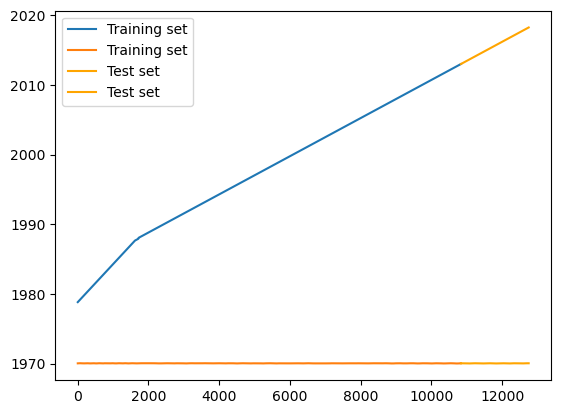

In [5]:
# Visualizing the training and test set
# plt.title('Airline passengers train and test sets', size=20)
plt.plot(train_nfc, label='Training set')
plt.plot(test_nfc, label='Test set', color='orange')
plt.legend()